# Question 1 - Tokens, Types & TTR

In [22]:
import nltk

In [23]:
from nltk.tokenize import TweetTokenizer

In [24]:
tknzr = TweetTokenizer()

In [187]:
import pandas as pd
import re
import string

In [188]:
csv_file = pd.read_csv('C:\\Users\\Anup\\Desktop\\tweets-dataset.csv', header=None)

tokens = [] #tokens is list containing lists
punc = string.punctuation
for i in range(1, len(csv_file)):
  tokens.append(tknzr.tokenize(csv_file[0][i]))

In [191]:
len_tokens = 0 #total num of tokens in corpus
tokens_arr = [] #list of all tokens 
for i in tokens:
    for j in i:
        if re.match(r"https:\/\/\S*|pic.twitter\S*",j) or re.match(r"\.[\s.]*\.",j) or j in punc:
            i.remove(j)
    tokens_arr += i
    len_tokens += len(i)

In [192]:
print "Number of tokens are:",len(tokens_arr)
print "Number of types are:",len(set(tokens_arr))
print "TTR :", float(len(set(tokens_arr)))/len(tokens_arr) #ratio of types to number of tokens

Number of tokens are: 320418
Number of types are: 47893
TTR : 0.149470379317


# Question 2 - Zipf's Law

In [141]:
import random
import math
import numpy as np
from scipy.optimize import curve_fit

In [123]:
from nltk.corpus import wordnet #using wordnet to return meanings

def len_meanings(word): #function which returns number of meanings of word
    synonyms = []
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
    return len(synonyms)

In [134]:
meanings_length = []
word_length = []
root_freq = []
freq = []
types = list(set(tokens_arr)) #list of types

for i in range(10000): #choosing random words from corpus
    
    rand = random.choice(types)
    coun = tokens_arr.count(rand)
    
    word_length.append(len(rand))
    root_freq.append(math.sqrt(coun))
    
    freq.append(coun)
    meanings_length.append(len_meanings(rand)) #appending number of meanings of word

### Number of meanings of word vs Square root of frequency

Text(0,0.5,'Number of meanings of word')

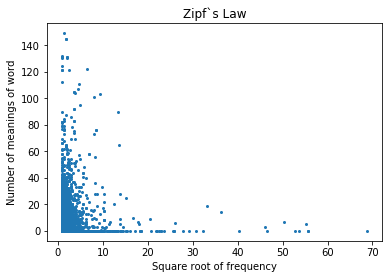

In [185]:
plt.scatter(root_freq, meanings_length,s=4) #plotting the graph between meanings of word to the root of length of word
plt.title('Zipf`s Law')
plt.xlabel('Square root of frequency')
plt.ylabel('Number of meanings of word')

### Frequency of words vs Length of word

In [172]:
def test_fl(n,k):
    return k*(1/n)

param1, param_cov1 = curve_fit(test, freq, word_length)
print("Length = "+ str(param1[0]) + " * 1 / Frequency")
ans = param1[0]/freq

Length = 10.147026386578966 * 1 / Frequency


Text(0,0.5,'Length of word')

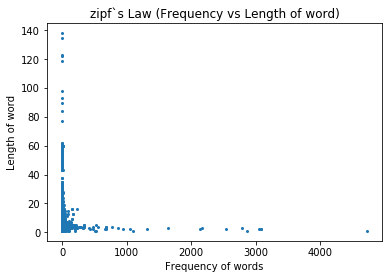

In [179]:
plt.scatter(freq, word_length, s=4)
plt.title('zipf`s Law (Frequency vs Length of word)')
plt.xlabel('Frequency of words')
plt.ylabel('Length of word')

### Length of word vs Number of meanings of word

Text(0.5,0,'Length of word')

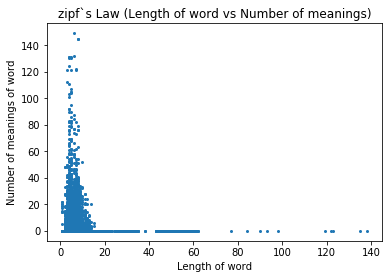

In [184]:
plt.scatter(word_length, meanings_length, s =4)
plt.title('zipf`s Law (Length of word vs Number of meanings)')
plt.ylabel('Number of meanings of word')
plt.xlabel('Length of word')

# Question 3 - Heap's Law

In [41]:
x = [] #Number of tokens
y = [] #Size of vocabulary

for i in range(1, len(tokens_arr),100):
    x.append(i)
    y.append(len(set(tokens_arr[:i])))

In [42]:
import matplotlib.pyplot as plt

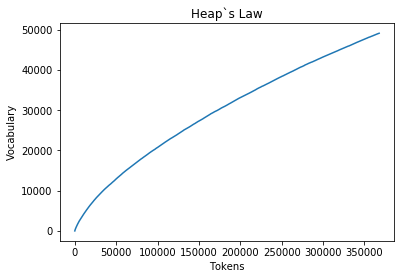

In [44]:
plt.plot(x, y)
plt.title('Heap`s Law')
plt.xlabel('Tokens')
plt.ylabel('Vocabulary')
plt.show()